In [70]:
# Importing libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.ensemble import RandomForestClassifier  # The model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Load Datasets
data=pd.read_csv("D:\mode\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [73]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [74]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [77]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [78]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [79]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


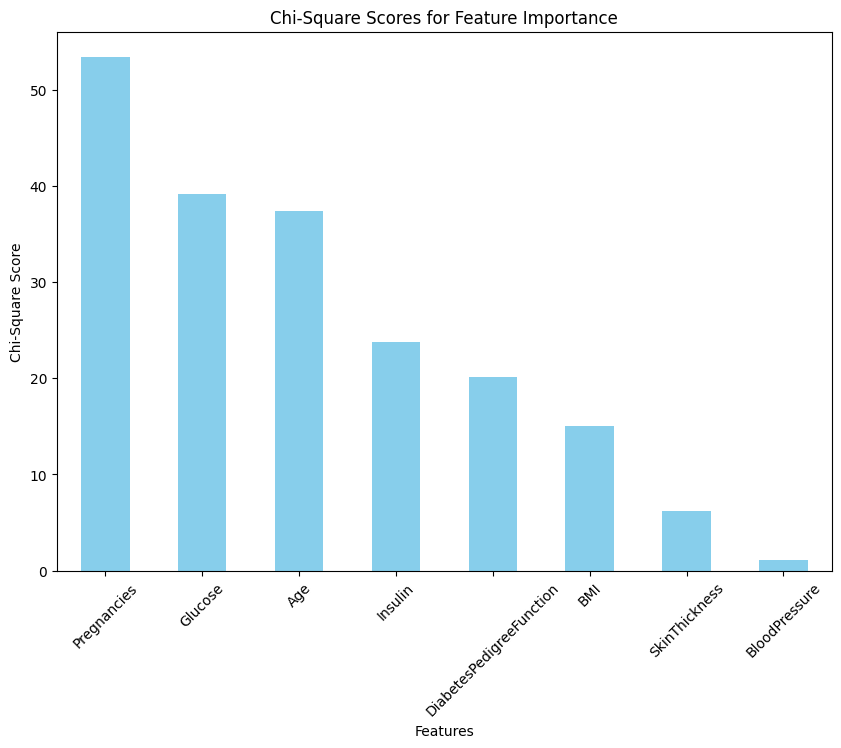

In [80]:

X =data.drop(columns=['Outcome'])
y =data['Outcome']
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(X)
chi_scores, p_values = chi2(X_discretized, y)
feature_names = X.columns
chi_scores_series = pd.Series(chi_scores, index=feature_names)
plt.figure(figsize=(10, 7))
chi_scores_series.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Chi-Square Scores for Feature Importance')
plt.ylabel('Chi-Square Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

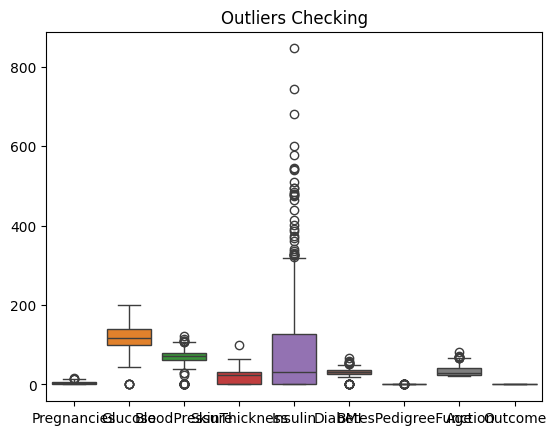

In [81]:
plt.title('Outliers Checking')
sns.boxplot(data=data)
plt.show()

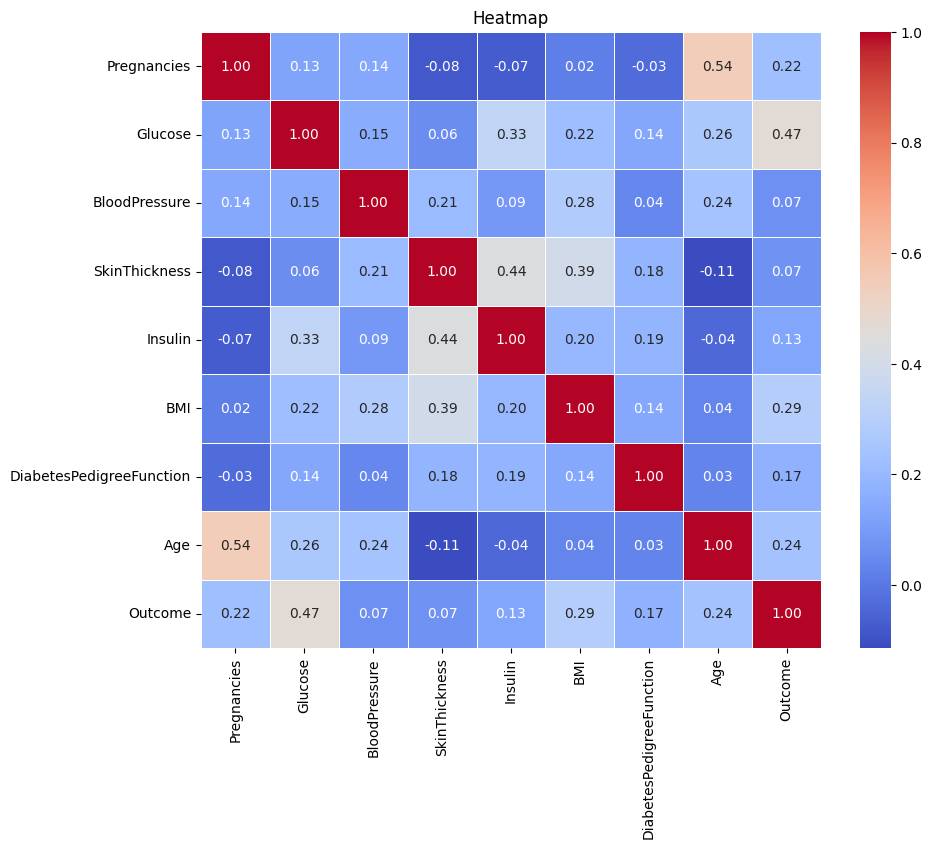

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap")
plt.show()

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape

((537, 8), (231, 8))

In [85]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
# Predict on the test set
y_pred =rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC calculation

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7532
Precision: 0.6386
Recall: 0.6625
F1-Score: 0.6503
AUC-ROC: 0.8056
Confusion Matrix:
[[121  30]
 [ 27  53]]


In [87]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Check training accuracy
train_predictions = model.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, train_predictions):.2f}")

Training Accuracy: 1.00


In [88]:
# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Calculate training error (Mean Squared Error)
train_error = mean_squared_error(y_train, y_train_pred)
print(f"Training Error (MSE): {train_error:.4f}")


Training Error (MSE): 0.0000


In [89]:
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Testing Accuracy: 0.75


In [90]:
# Make predictions on the testing set
y_test_pred = rf_model.predict(X_test)

# Calculate testing error (Mean Squared Error)
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Testing Error (MSE): {test_error:.4f}")


Testing Error (MSE): 0.2468


In [91]:
import joblib
joblib.dump(rf_model,r'D:\mode\model_pred\iforest.pkl')
model_pred = joblib.load(r'D:\mode\model_pred\iforest.pkl')

In [92]:
Pregnancies =6
Glucose =148
BloodPressure =72
SkinThickness =3
Insulin =0
BMI =33.6
DiabetesPedigreeFunction =0.627
Age =6
result = model_pred.predict([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])

if result == 0:  
    diagnosis = 'THE PATIENT HAS NO DIABETES'
else:
    diagnosis = 'THE PATIENT HAS DIABETES'
print(f"The diagnosis is: {diagnosis}")

The diagnosis is: THE PATIENT HAS DIABETES
